<a href="https://colab.research.google.com/github/federicocrespo10/mental-health-machine-learning/blob/main/Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import randint


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report


##Loading DF

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mentoria- Gringo/mental health/survey.csv')

In [ ]:
raw_data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


##Exploring DF

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
raw_data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
raw_data.describe(exclude='number')

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:31:41,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5


In [ ]:
raw_data['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

##Detecting nulls

In [ ]:
raw_data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
raw_data = raw_data.drop(['Timestamp','comments','state'], axis=1)

In [ ]:
raw_data.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [ ]:
raw_data['work_interfere'].value_counts(normalize=True)

Sometimes    0.467337
Never        0.214070
Rarely       0.173869
Often        0.144724
Name: work_interfere, dtype: float64

In [ ]:
raw_data['work_interfere'] = raw_data['work_interfere'].fillna(method='ffill')

In [ ]:
raw_data['self_employed'] = raw_data['self_employed'].fillna(method='bfill')

In [ ]:
raw_data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [ ]:
raw_data['work_interfere'].value_counts(normalize=True)

Sometimes    0.471803
Never        0.214456
Rarely       0.169182
Often        0.144559
Name: work_interfere, dtype: float64

In [ ]:
raw_data.value_counts()

Age           Gender  Country         self_employed  family_history  treatment  work_interfere  no_employees    remote_work  tech_company  benefits    care_options  wellness_program  seek_help   anonymity   leave               mental_health_consequence  phys_health_consequence  coworkers     supervisor    mental_health_interview  phys_health_interview  mental_vs_physical  obs_consequence
 35           Male    Denmark         Yes            Yes             Yes        Often           1-5             No           Yes           No          Yes           Yes               No          Don't know  Somewhat easy       No                         No                       Some of them  Some of them  Maybe                    Yes                    Yes                 No                 2
 32           male    United Kingdom  No             Yes             Yes        Rarely          6-25            No           No            No          No            No                No          No          Don't 

##Showing some facts

In [ ]:
raw_data.Age.max()

99999999999

In [ ]:
raw_data.Age.min()

-1726

(array([1.258e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-1.72600000e+03,  4.16666501e+09,  8.33333175e+09,  1.24999985e+10,
         1.66666652e+10,  2.08333320e+10,  2.49999987e+10,  2.91666654e+10,
         3.33333322e+10,  3.74999989e+10,  4.16666657e+10,  4.58333324e+10,
         4.99999991e+10,  5.41666659e+10,  5.83333326e+10,  6.24999994e+10,
         6.66666661e+10,  7.08333328e+10,  7.49999996e+10,  7.91666663e+10,
         8.33333330e+10,  8.74999998e+10,  9.16666665e+10,  9.58333333e+10,
         1.00000000e+11]),
 <a list of 24 Patch objects>)

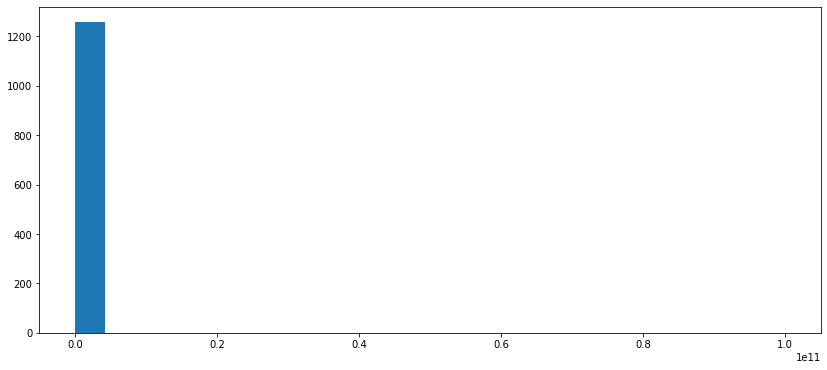

In [ ]:
plt.figure(figsize=(14,6))
plt.hist(raw_data['Age'], bins=24)

We can expect Outliers in here.

In [ ]:
raw_data['Age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

In [ ]:
mh_noout= raw_data[raw_data['Age']>0]

In [ ]:
Q1 = mh_noout['Age'].quantile(0.25)
Q3= mh_noout['Age'].quantile(0.75)
IQR = Q3 - Q1


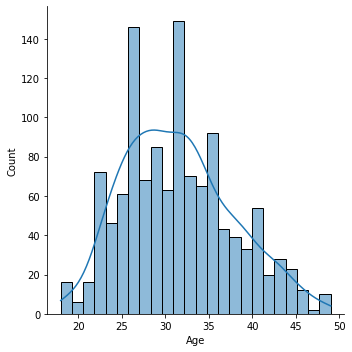

In [ ]:
mh_noout = mh_noout[~((mh_noout['Age'] < (Q1 - 1.5 * IQR)) |(mh_noout['Age'] > (Q3 + 1.5 * IQR)))]

sns.displot(data=mh_noout, x='Age', bins=24, kde=True)

In [ ]:
mh_noout['Age'].mean()

31.46841673502871

In [ ]:
mh_noout.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Yes,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,Yes,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Yes,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Yes,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,Yes,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


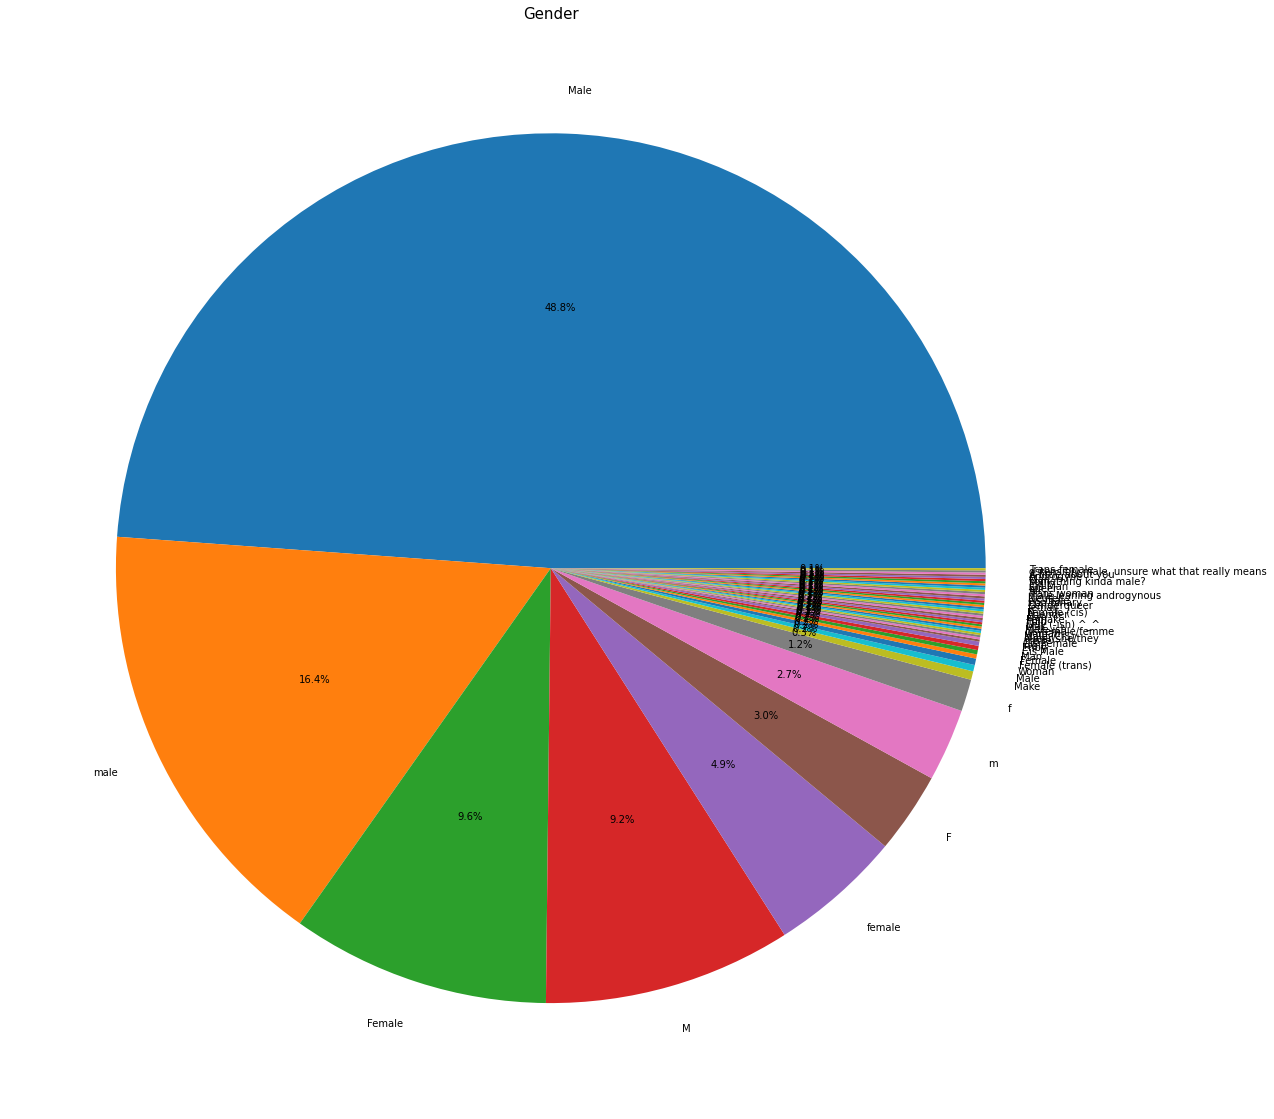

In [ ]:
Genderslist = raw_data.Gender.value_counts().reset_index(name='Gender').rename(columns={'index':'Gender','Gender':'Quantity'})

plt.figure(figsize=(30,20))
plt.pie(Genderslist['Quantity'],labels=Genderslist['Gender'],autopct='%1.1f%%')
plt.title('Gender',fontsize=15)
plt.show()


In [ ]:
raw_data.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
mh_noout['Gender'] = mh_noout['Gender'].str.lower()

In [ ]:
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
non_binary = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means",'A little about you', 'p']           

In [ ]:
for (row, col) in mh_noout.iterrows():

    if str.lower(col.Gender) in male:
        mh_noout['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female:
        mh_noout['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in non_binary:
        mh_noout['Gender'].replace(to_replace=col.Gender, value='n_b', inplace=True)

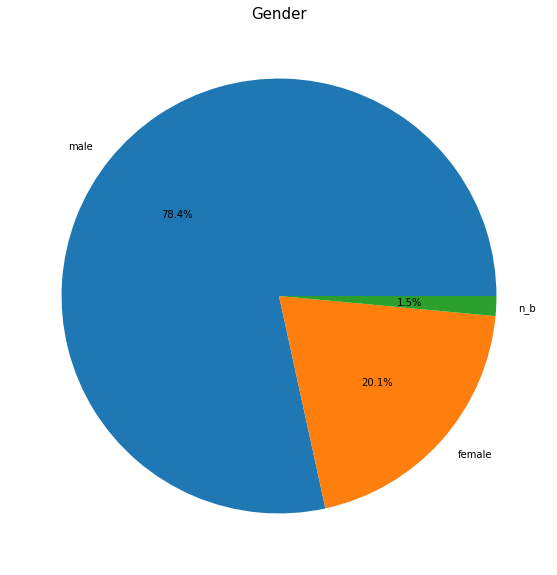

In [ ]:
Genderslist = mh_noout.Gender.value_counts().reset_index(name='Gender').rename(columns={'index':'Gender','Gender':'Quantity'})

plt.figure(figsize=(20,10))
plt.pie(Genderslist['Quantity'],labels=Genderslist['Gender'],autopct='%1.1f%%')
plt.title('Gender',fontsize=15)
plt.show()


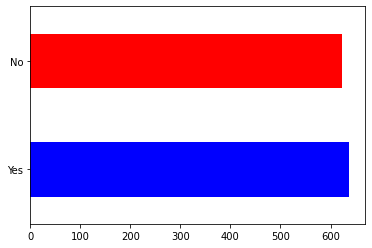

In [ ]:
raw_data['treatment'].value_counts().plot(kind='barh', color=['b','r'])

##Encoding Data

In [ ]:
mh_noout.describe(exclude='number')

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219
unique,3,46,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2
top,male,United States,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,956,721,1066,738,614,583,286,866,998,458,490,820,631,792,545,473,902,753,495,978,539,557,1045


Binary categories:
obs_consequence, tech_company, remote_work, family_history, self_employed, treatment

In [ ]:
mh_noout['self_employed_enc']=mh_noout['self_employed'].apply(lambda val: 1 if val == 'Yes' else 0)

In [ ]:
mh_noout['family_history_enc']=mh_noout['family_history'].apply(lambda val: 1 if val == 'Yes' else 0)

In [ ]:
mh_noout['remote_work_enc']=mh_noout['remote_work'].apply(lambda val: 1 if val == 'Yes' else 0)

In [ ]:
mh_noout['tech_company_enc']=mh_noout['tech_company'].apply(lambda val: 1 if val == 'Yes' else 0)

In [ ]:
mh_noout['obs_consequence_enc']=mh_noout['obs_consequence'].apply(lambda val: 1 if val == 'Yes' else 0)

Target

In [ ]:
mh_noout['treatment_enc']=mh_noout['treatment'].apply(lambda val: 1 if val == 'Yes' else 0)

Dropping columns

In [ ]:
mh_noout = mh_noout.drop(['self_employed','family_history', 'remote_work', 'tech_company','obs_consequence','treatment'], axis=1)

In [ ]:
mh_noout.columns

Index(['Age', 'Gender', 'Country', 'work_interfere', 'no_employees',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'self_employed_enc', 'family_history_enc',
       'remote_work_enc', 'tech_company_enc', 'obs_consequence_enc',
       'treatment_enc'],
      dtype='object')

3 or more categories: Gender, Country, work_interfere, no_employees, benefits, care_oprions, wellness_program, seek_help, anonimity_leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical

In [ ]:
le = LabelEncoder()

mh_noout['Gender_le'] = le.fit_transform(mh_noout['Gender'])

mh_noout[['Gender_le','Gender']].value_counts()

Gender_le  Gender
1          male      956
0          female    245
2          n_b        18
dtype: int64

In [ ]:
mh_noout['Country']=le.fit_transform(mh_noout['Country'])
mh_noout['work_interfere']= le.fit_transform(mh_noout['work_interfere'])
mh_noout['no_employees']= le.fit_transform(mh_noout['no_employees'])
mh_noout['care_options']=le.fit_transform(mh_noout['care_options'])
mh_noout['wellness_program'] = le.fit_transform(mh_noout['wellness_program'])
mh_noout['seek_help'] = le.fit_transform(mh_noout['seek_help'])
mh_noout['anonymity'] = le.fit_transform(mh_noout['anonymity'])
mh_noout['leave'] = le.fit_transform(mh_noout['leave'])
mh_noout['mental_health_consequence'] = le.fit_transform(mh_noout['mental_health_consequence'])
mh_noout['coworkers'] = le.fit_transform(mh_noout['coworkers'])
mh_noout['supervisor'] = le.fit_transform(mh_noout['supervisor'])
mh_noout['mental_health_interview'] = le.fit_transform(mh_noout['mental_health_interview'])
mh_noout['phys_health_interview'] = le.fit_transform(mh_noout['phys_health_interview'])
mh_noout['mental_vs_physical'] = le.fit_transform(mh_noout['mental_vs_physical'])
mh_noout['benefits'] = le.fit_transform(mh_noout['benefits'])
mh_noout['phys_health_consequence'] = le.fit_transform(mh_noout['phys_health_consequence'])

In [ ]:
mh = mh_noout.drop(['Gender','Country'],axis=1)

In [ ]:
mh_noout.head()

,Age,Gender,Country,work_interfere,no_employees,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,self_employed_enc,family_history_enc,remote_work_enc,tech_company_enc,obs_consequence_enc,treatment_enc,Gender_le
0,37,female,44,1,4,2,1,1,2,2,2,1,1,1,2,1,0,2,1,0,0,1,0,1,0
1,44,male,44,2,5,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1
2,32,male,6,2,4,1,0,1,1,0,1,1,1,2,2,2,2,1,1,0,0,1,0,0,1
3,31,male,43,1,2,1,2,1,1,1,1,2,2,1,0,0,0,1,1,1,0,1,1,1,1
4,31,male,44,0,1,2,0,0,0,0,0,1,1,1,2,2,2,0,1,0,1,1,0,0,1


In [ ]:
mh_noout.isnull().sum()

Age                          0
Gender                       0
Country                      0
work_interfere               0
no_employees                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
self_employed_enc            0
family_history_enc           0
remote_work_enc              0
tech_company_enc             0
obs_consequence_enc          0
treatment_enc                0
Gender_le                    0
dtype: int64

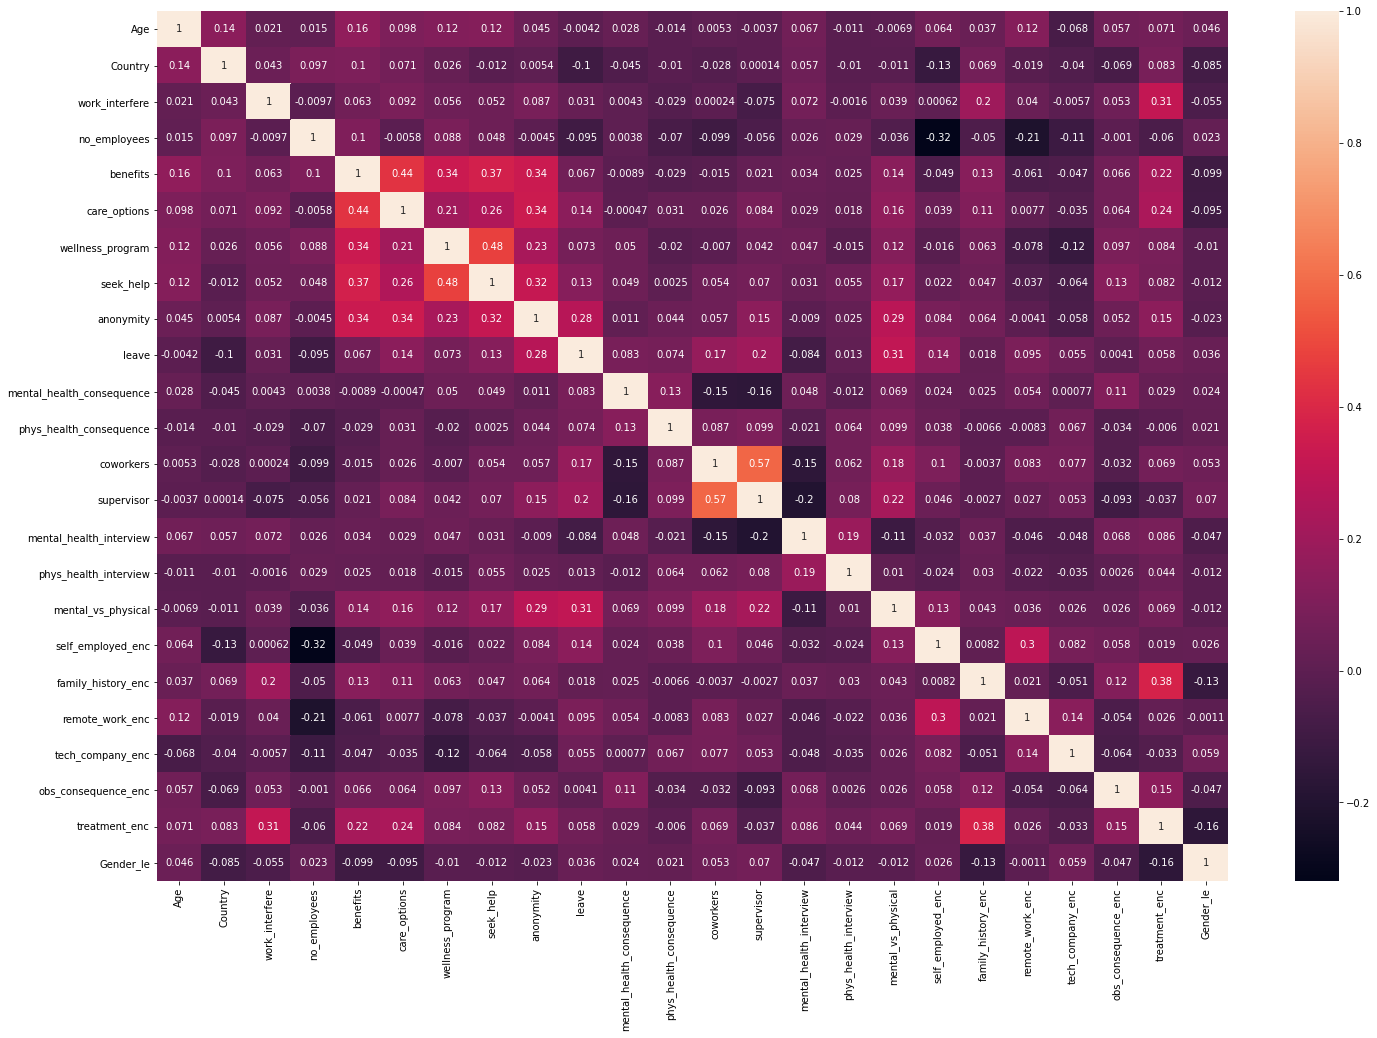

In [ ]:
corr_df= mh_noout.corr(method='pearson')

plt.figure(figsize=(24, 16))
sns.heatmap(corr_df, annot=True)
plt.show()

[Text(0, 0, 'family_history_enc'),
 Text(0, 0, 'work_interfere'),
 Text(0, 0, 'care_options'),
 Text(0, 0, 'benefits'),
 Text(0, 0, 'Gender_le'),
 Text(0, 0, 'obs_consequence_enc'),
 Text(0, 0, 'anonymity'),
 Text(0, 0, 'mental_health_interview'),
 Text(0, 0, 'wellness_program')]

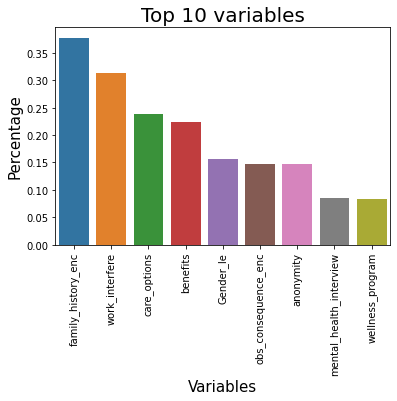

In [ ]:
correlation = corr_df['treatment_enc'].round(decimals=3).abs().sort_values(ascending=False).reset_index()[1:10]


ax = sns.barplot(x= 'index', y = 'treatment_enc', data = correlation)
ax.axes.set_title('Top 10 variables',fontsize=20)
ax.set_xlabel('Variables',fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


In [ ]:
correlation

,index,treatment_enc
1,family_history_enc,0.378
2,work_interfere,0.314
3,care_options,0.238
4,benefits,0.224
5,Gender_le,0.157
6,obs_consequence_enc,0.147
7,anonymity,0.147
8,mental_health_interview,0.086
9,wellness_program,0.084


##Scaling Age

In [ ]:
sc= MinMaxScaler()
mh_noout['Age'] = sc.fit_transform(mh_noout[['Age']])

mh_noout.head()


,Age,Gender,Country,work_interfere,no_employees,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,self_employed_enc,family_history_enc,remote_work_enc,tech_company_enc,obs_consequence_enc,treatment_enc,Gender_le
0,0.612903,female,44,1,4,2,1,1,2,2,2,1,1,1,2,1,0,2,1,0,0,1,0,1,0
1,0.838710,male,44,2,5,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1
2,0.451613,male,6,2,4,1,0,1,1,0,1,1,1,2,2,2,2,1,1,0,0,1,0,0,1
3,0.419355,male,43,1,2,1,2,1,1,1,1,2,2,1,0,0,0,1,1,1,0,1,1,1,1
4,0.419355,male,44,0,1,2,0,0,0,0,0,1,1,1,2,2,2,0,1,0,1,1,0,0,1


In [ ]:
mh = mh_noout

##Spliting the data

In [ ]:
X_features = ['family_history_enc','work_interfere','care_options','benefits','Gender_le','anonymity','obs_consequence_enc','mental_health_interview','wellness_program']

In [ ]:
X= mh[X_features]
y=mh['treatment_enc']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)


In [ ]:
model_results= []

In [ ]:
auc_scores = []

#Machine Learning Models

###DECISSION TREE

In [ ]:
dt = DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred_DT = dt.predict(X_test)
print(y_pred_DT[0:5])

[0 1 0 1 1]


In [ ]:
acc_DT = accuracy_score(y_test, y_pred_DT)
print("Decission Tree Test set accuracy: {:.2f}".format(acc_DT))

Decission Tree Test set accuracy: 0.72


In [ ]:
model_results.append(['Decision Tree', acc_DT])

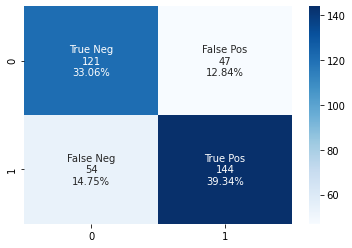

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_DT)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(classification_report(y_pred_DT, y_test))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       175
           1       0.73      0.75      0.74       191

    accuracy                           0.72       366
   macro avg       0.72      0.72      0.72       366
weighted avg       0.72      0.72      0.72       366



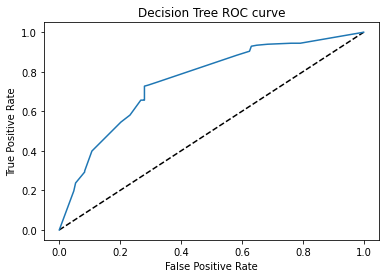

In [ ]:
y_pred_prob = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = "Decision Tree Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.show()

In [ ]:
dt_auc_score = roc_auc_score(y_test, y_pred_prob)
dt_auc_score

0.7544943482443482

In [ ]:
auc_scores.append(['Decision Tree', dt_auc_score])

In [ ]:
cv_auc = cross_val_score(dt, X, y, cv= 5, scoring= 'roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.79184304 0.8117987  0.81267218 0.74249143 0.7380775 ]


###Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state=42)


logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)
print(y_pred_log[0:5])

[0 1 0 1 0]


In [ ]:
logreg_acc = accuracy_score(y_test, y_pred_log)
print(" Logaritmic Regression Test set accuracy: {:.2f}".format(logreg_acc))

 Logaritmic Regression Test set accuracy: 0.70


In [ ]:
model_results.append(['Logistic Regression', logreg_acc])


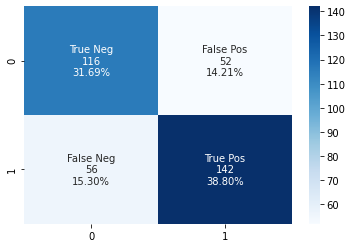

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_log)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(classification_report(y_pred_log, y_test))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       172
           1       0.72      0.73      0.72       194

    accuracy                           0.70       366
   macro avg       0.70      0.70      0.70       366
weighted avg       0.70      0.70      0.70       366



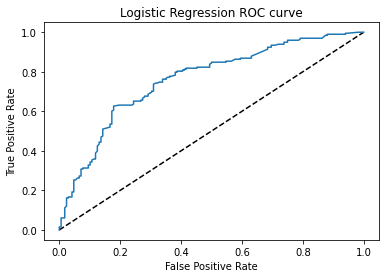

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

In [ ]:
log_auc_score = roc_auc_score(y_test, y_pred_prob)
dt_auc_score

0.7544943482443482

In [ ]:
auc_scores.append(['Logistic Regression', dt_auc_score])

In [ ]:
cv_auc = cross_val_score(logreg, X, y, cv= 5, scoring= 'roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.8074313  0.84986226 0.7972183  0.76748639 0.73689202]


###Random Forest

In [ ]:
rf= RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf= rf.predict(X_test)

In [ ]:
rf_acc= accuracy_score(y_test, y_pred_rf)

In [ ]:
rf_acc
print("Random Forest Classifier Test set accuracy: {:.2f}".format(rf_acc))

Random Forest Classifier Test set accuracy: 0.70


In [ ]:
model_results.append(['Random Forest', rf_acc])

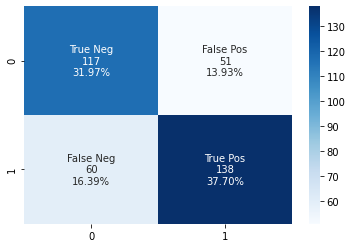

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_rf)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       177
           1       0.70      0.73      0.71       189

    accuracy                           0.70       366
   macro avg       0.70      0.70      0.70       366
weighted avg       0.70      0.70      0.70       366



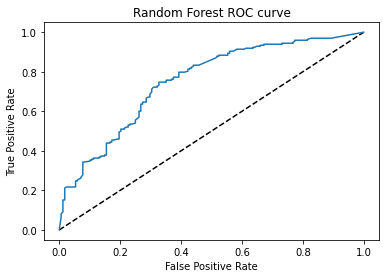

In [ ]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [ ]:
rf_auc_score = roc_auc_score(y_test, y_pred_prob)
dt_auc_score

0.7544943482443482

In [ ]:
auc_scores.append(['Random Forest', rf_auc_score])

In [ ]:
cv_auc = cross_val_score(rf, X, y, cv= 5, scoring= 'roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.76533629 0.81593093 0.75791171 0.75424982 0.720126  ]


###KNN 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test,y_pred_knn)
print("KNeighbors Classifier Test set accuracy: {:.2f}".format(knn_acc))

KNeighbors Classifier Test set accuracy: 0.69


In [ ]:
model_results.append(['KNeighbors Classifier', knn_acc])

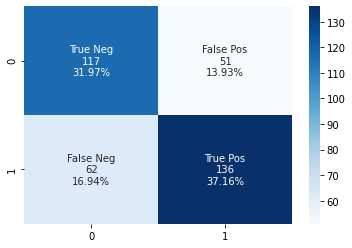

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_knn)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

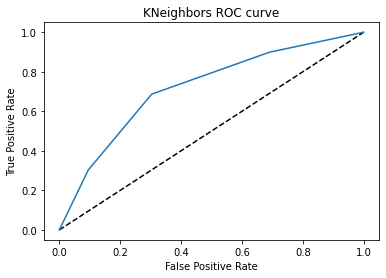

In [ ]:
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = "KNeighbors")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNeighbors ROC curve')
plt.show()

In [ ]:
knn_auc_score = roc_auc_score(y_test, y_pred_prob)
dt_auc_score

0.7544943482443482

In [ ]:
auc_scores.append(['KNeighbors', knn_auc_score])

In [ ]:
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       179
           1       0.69      0.73      0.71       187

    accuracy                           0.69       366
   macro avg       0.69      0.69      0.69       366
weighted avg       0.69      0.69      0.69       366



In [ ]:
cv_auc = cross_val_score(knn, X, y, cv= 5, scoring= 'roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.74480951 0.74544783 0.72764228 0.74118121 0.64679583]


###SVC

In [ ]:
svc= SVC(probability=True)

In [ ]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_svc = svc.predict(X_test)


In [ ]:
svc_acc= accuracy_score(y_test,y_pred_svc)
print("SVC Test set accuracy: {:.2f}".format(svc_acc))

SVC Test set accuracy: 0.74


In [ ]:
model_results.append(['SVC', svc_acc])

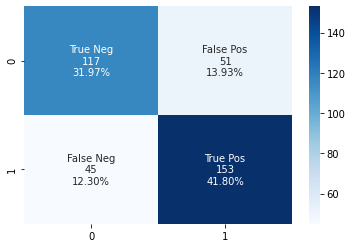

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_svc)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(classification_report(y_pred_svc, y_test))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       162
           1       0.77      0.75      0.76       204

    accuracy                           0.74       366
   macro avg       0.73      0.74      0.74       366
weighted avg       0.74      0.74      0.74       366



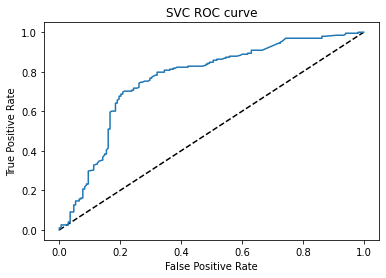

In [ ]:
y_pred_prob = svc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = "SVC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC curve')
plt.show()

In [ ]:
svc_auc_score = roc_auc_score(y_test, y_pred_prob)
svc_auc_score

0.7625661375661376

In [ ]:
auc_scores.append(['SVC', svc_auc_score])

In [ ]:
cv_auc = cross_val_score(svc, X, y, cv= 5, scoring= 'roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.80366862 0.84683867 0.80985016 0.76479876 0.74136296]


Hypertunning


In [ ]:
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}

In [ ]:
searcher = GridSearchCV(svc, parameters)
searcher.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'C': 1, 'gamma': 0.1}
Best CV accuracy 0.7573099415204678


In [ ]:
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Test accuracy of best grid search hypers: 0.7349726775956285


In [ ]:
score = cross_val_score(svc, X, y, cv=3, scoring='accuracy')
score

array([0.75429975, 0.75615764, 0.71674877])

###XGBOOST

In [ ]:
xgb= xgb.XGBClassifier()

xgb.fit(X_train,y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

xgb_acc = accuracy_score(y_test,y_pred_xgb)

In [ ]:
print("XGB Test set accuracy: {:.2f}".format(xgb_acc))

XGB Test set accuracy: 0.75


In [ ]:
model_results.append(['XGB', xgb_acc])

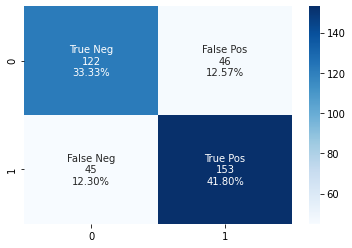

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_xgb)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(classification_report(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       167
           1       0.77      0.77      0.77       199

    accuracy                           0.75       366
   macro avg       0.75      0.75      0.75       366
weighted avg       0.75      0.75      0.75       366



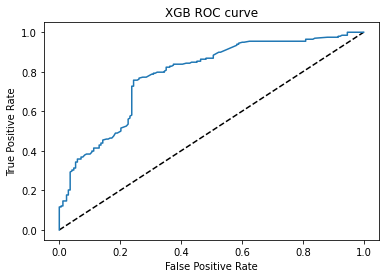

In [ ]:
y_pred_prob = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = "xgb")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB ROC curve')
plt.show()

In [ ]:
xgb_auc_score = roc_auc_score(y_test, y_pred_prob)
xgb_auc_score

0.7852332852332853

In [ ]:
auc_scores.append(['XGB', xgb_auc_score])

###XGB Hypertunning

In [ ]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
xgb_grid = GridSearchCV(estimator=estimator,param_grid=parameters, scoring='roc_auc',cv=10,n_jobs=10, verbose = True)

In [ ]:
xgb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   24.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.0min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  2.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
        

In [ ]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

**Resultados**

In [ ]:
summary_model= pd.DataFrame(model_results, columns = ['Model','Accuracy'])

In [ ]:
summary_model = summary_model.sort_values(by='Accuracy', ascending = False).reset_index()
print(summary_model)


   index                  Model  Accuracy
0      5                    XGB  0.751366
1      4                    SVC  0.737705
2      0          Decision Tree  0.724044
3      1    Logistic Regression  0.704918
4      2          Random Forest  0.696721
5      3  KNeighbors Classifier  0.691257


[Text(0, 0, 'XGB'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'KNeighbors Classifier')]

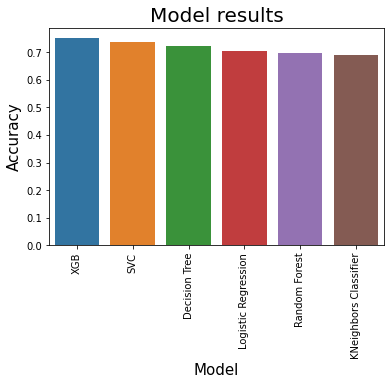

In [ ]:
ax = sns.barplot(x= 'Model', y = 'Accuracy', data = summary_model)
ax.axes.set_title('Model results',fontsize=20)
ax.set_xlabel('Model',fontsize=15)
ax.set_ylabel('Accuracy',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

**AUC Scores**

In [ ]:
AUC_model= pd.DataFrame(auc_scores, columns = ['Model','AUC'])

In [ ]:
AUC_model = AUC_model.sort_values(by='AUC', ascending = False).reset_index()
print(AUC_model)

   level_0  index                Model       AUC
0        5      4                  XGB  0.785233
1        4      5                  SVC  0.762566
2        2      0        Decision Tree  0.754494
3        3      1  Logistic Regression  0.754494
4        1      2        Random Forest  0.751458
5        0      3           KNeighbors  0.718224


[Text(0, 0, 'XGB'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'KNeighbors')]

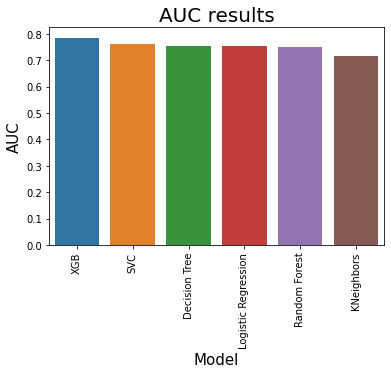

In [ ]:
ax = sns.barplot(x= 'Model', y = 'AUC', data = AUC_model)
ax.axes.set_title('AUC results',fontsize=20)
ax.set_xlabel('Model',fontsize=15)
ax.set_ylabel('AUC',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

##HYPERTUNNING

Trying with Logisitic Regression

In [ ]:
logreg = LogisticRegression()
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [ ]:
logreg_cv = GridSearchCV(logreg, param_grid , cv=5)

In [ ]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refit=True, r

In [ ]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.7291640866873065


Trying with Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}


In [ ]:
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

In [ ]:
tree_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 2}
Best score is 0.7303955968352254


In [ ]:
# TABLEAU.
# GRAFICOS DE ROC_AUC JUNTOS.
# CREAR DATAFRAME Y EXPONERLO AL MODELO, MOSTRAR EL RESULTADO FINAL DEL MODELO.